## Data Transformation and Baseline Results Comparison
Trying Yeo-Johnson Transformation, Standard Scaler, Robust Scaler, MinMax Sclaer on data(11 features, normalizsation of useful vote removed)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# from sklearn.preprocessing import power_transform
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#import data
train_df = pd.read_parquet("train_main.parquet.snappy")
test_df = pd.read_parquet("test_main.parquet.snappy")
val_df = pd.read_parquet("val_main.parquet.snappy")

In [3]:
# skewed features: 
# review length(r_length)
# friends count(u_friends_count)
# review count(u_review_count)
# age of account(u_month_age)
# busniess review count(b_review_count)
# review usefulness(r_useful) [target variable]

### PART I. Transformation on Skewed Features only
### (a). Yeo-Johnson Transformation

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired. Yeo-Johnson supports both positive or negative data

In [4]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
# scale skewed
yeo_train_df = train_df.copy(deep=True)
yeo_train_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']] = pt.fit_transform(train_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']])

yeo_test_df = test_df.copy(deep=True)
yeo_test_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']] = pt.transform(test_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']])

yeo_val_df = val_df.copy(deep=True)
yeo_val_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']] = pt.transform(val_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']])
# yeo_val_df

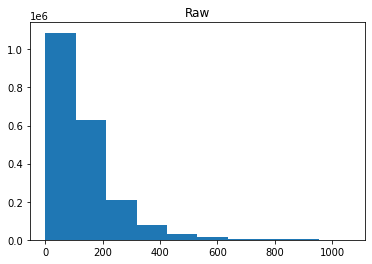

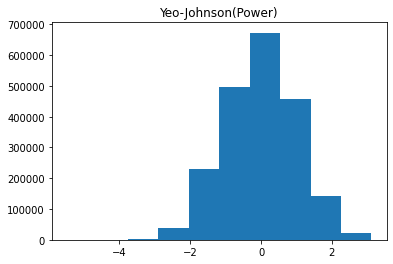

In [5]:
# plot example
plt.hist(train_df.r_length); plt.title("Raw"); plt.show()
plt.hist(yeo_train_df.r_length); plt.title("Yeo-Johnson(Power)");

#### fit model and compare results with baseline

In [6]:
X_train = yeo_train_df.drop(['r_id','r_useful'],axis=1)
y_train = yeo_train_df['r_useful']
X_test = yeo_test_df.drop(['r_id','r_useful'],axis=1)
y_test = yeo_test_df['r_useful']
X_val = yeo_val_df.drop(['r_id','r_useful'],axis=1)
y_val = yeo_val_df['r_useful']

In [7]:
# MLR(sgd)
y_sgd = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000))
# do we need to standard sclae the whole data agian?
# y_sgd = SGDRegressor(max_iter=1000)
y_sgd.fit(X_train, y_train)

y_pred_train_sgd = y_sgd.predict(X_train)
y_pred_test_sgd  = y_sgd.predict(X_test)

mae = mean_absolute_error(y_train, y_pred_train_sgd)
mse = mean_squared_error(y_train, y_pred_train_sgd)
rmse = np.sqrt(mse)
print("MLR(sgd) On Yeo-Johnson Transformed data: ")
print("On training set: RMSE:", rmse, "MAE", mae)

#Prediction(test) 
mae = mean_absolute_error(y_test, y_pred_test_sgd)
mse = mean_squared_error(y_test, y_pred_test_sgd)
rmse = np.sqrt(mse)
print("On test set: RMSE:", rmse, "MAE", mae)

print("Baseline results: ")
print("On training set: RMSE: 4.471520980420466 MAE 1.6702892342459608")
print("On test set: RMSE: 4.049626636870791 MAE 1.6721592006498984")

MLR(sgd) On Yeo-Johnson Transformed data: 
On training set: RMSE: 4.563690417754582 MAE 1.7756398712604309
On test set: RMSE: 4.148671549599623 MAE 1.778230752372799
Baseline results: 
On training set: RMSE: 4.471520980420466 MAE 1.6702892342459608
On test set: RMSE: 4.049626636870791 MAE 1.6721592006498984


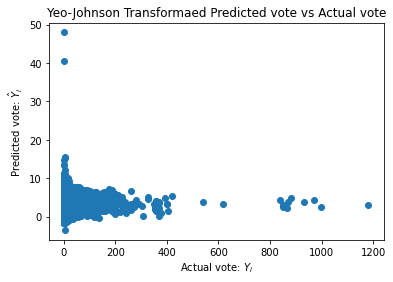

In [8]:
plt.scatter(y_train, y_pred_train_sgd)
plt.xlabel("Actual vote: $Y_i$")
plt.ylabel("Predicted vote: $\hat{Y}_i$")
plt.title("Yeo-Johnson Transformaed Predicted vote vs Actual vote")
plt.show()

### (b). StandardScaler
using sklearn.preprocessing.StandardScaler()

StandardScaler removes the mean and scales the data to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scale skewed and target features
std_train_df = train_df.copy(deep=True)
std_train_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']] = scaler.fit_transform(train_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']])

std_test_df = test_df.copy(deep=True)
std_test_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']] = scaler.transform(test_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']])

std_val_df = val_df.copy(deep=True)
std_val_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']] = scaler.transform(val_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']])
# std_val_df

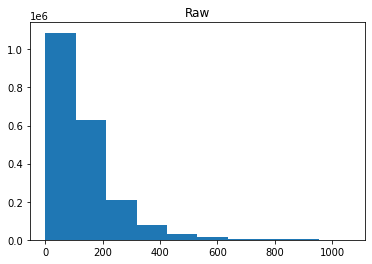

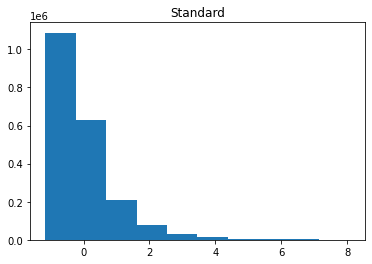

In [10]:
# plot example
plt.hist(train_df.r_length); plt.title("Raw"); plt.show()
plt.hist(std_train_df.r_length); plt.title("Standard");

#### fit model and compare with baseline

In [11]:
X_train = std_train_df.drop(['r_id','r_useful'],axis=1)
y_train = std_train_df['r_useful']
X_test = std_test_df.drop(['r_id','r_useful'],axis=1)
y_test = std_test_df['r_useful']
X_val = std_val_df.drop(['r_id','r_useful'],axis=1)
y_val = std_val_df['r_useful']

In [12]:
# MLR(sgd)
s_sgd = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000)) 
# do we need to standard sclae the whole data agian?
# without pipeline standardscaler of the whole data, RMSE and MAE are slightly higher, by 0.1 in RMSE for both train and test; 0.05 in MAE for both
# s_sgd = SGDRegressor(max_iter=1000)
s_sgd.fit(X_train, y_train)

y_pred_train_sgd = s_sgd.predict(X_train)
y_pred_test_sgd  = s_sgd.predict(X_test)

mae = mean_absolute_error(y_train, y_pred_train_sgd)
mse = mean_squared_error(y_train, y_pred_train_sgd)
rmse = np.sqrt(mse)
print("MLR(sgd) On StandardScaler Transformed data: ")
print("On training set: RMSE:", rmse, "MAE", mae)

#Prediction(test) 
mae = mean_absolute_error(y_test, y_pred_test_sgd)
mse = mean_squared_error(y_test, y_pred_test_sgd)
rmse = np.sqrt(mse)
print("On test set: RMSE:", rmse, "MAE", mae)

MLR(sgd) On StandardScaler Transformed data: 
On training set: RMSE: 4.47464039120345 MAE 1.6872885876504484
On test set: RMSE: 4.052646133622046 MAE 1.68855985796349


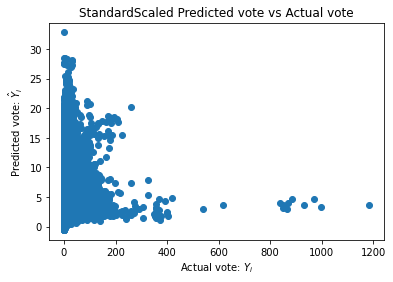

In [13]:
plt.scatter(y_train, y_pred_train_sgd)
plt.xlabel("Actual vote: $Y_i$")
plt.ylabel("Predicted vote: $\hat{Y}_i$")
plt.title("StandardScaled Predicted vote vs Actual vote")
plt.show()

### (c). RobustScaler Transformation

using sklearn.preprocessing.RobustScaler

Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range

In [14]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# scale skewed and target features
rbs_train_df = train_df.copy(deep=True)
rbs_train_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']] = scaler.fit_transform(train_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']])

rbs_test_df = test_df.copy(deep=True)
rbs_test_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']] = scaler.transform(test_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']])

rbs_val_df = val_df.copy(deep=True)
rbs_val_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']] = scaler.transform(val_df[['r_length', 'u_friends_count', 'u_review_count', 'u_month_age', 'b_review_count']])
# rbs_val_df

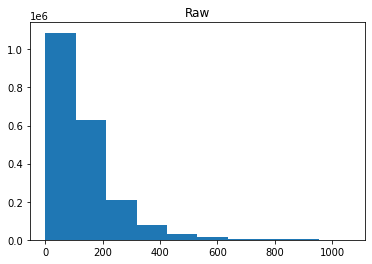

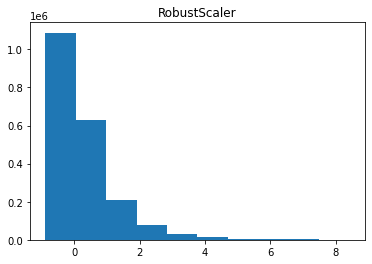

In [15]:
# plot example
plt.hist(train_df.r_length); plt.title("Raw"); plt.show()
plt.hist(rbs_train_df.r_length); plt.title("RobustScaler");

#### fit model and compare with baseline

In [16]:
X_train = rbs_train_df.drop(['r_id','r_useful'],axis=1)
y_train = rbs_train_df['r_useful']
X_test = rbs_test_df.drop(['r_id','r_useful'],axis=1)
y_test = rbs_test_df['r_useful']
X_val = rbs_val_df.drop(['r_id','r_useful'],axis=1)
y_val = rbs_val_df['r_useful']

In [17]:
# MLR(sgd)
r_sgd = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000)) 
r_sgd.fit(X_train, y_train)

pred_train_sgd = r_sgd.predict(X_train)
pred_test_sgd  = r_sgd.predict(X_test)

mae = mean_absolute_error(y_train, y_pred_train_sgd)
mse = mean_squared_error(y_train, y_pred_train_sgd)
rmse = np.sqrt(mse)
print("MLR(sgd) On RobustScaler Transformed data: ")
print("On training set: RMSE:", rmse, "MAE", mae)

#Prediction(test) 
mae = mean_absolute_error(y_test, y_pred_test_sgd)
mse = mean_squared_error(y_test, y_pred_test_sgd)
rmse = np.sqrt(mse)
print("On test set: RMSE:", rmse, "MAE", mae)


MLR(sgd) On RobustScaler Transformed data: 
On training set: RMSE: 4.47464039120345 MAE 1.6872885876504484
On test set: RMSE: 4.052646133622046 MAE 1.68855985796349


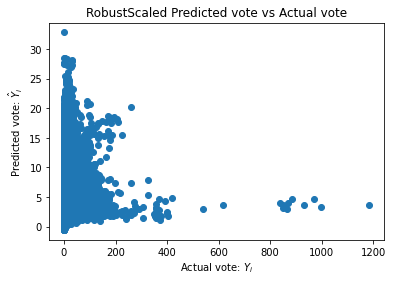

In [18]:
plt.scatter(y_train, y_pred_train_sgd)
plt.xlabel("Actual vote: $Y_i$")
plt.ylabel("Predicted vote: $\hat{Y}_i$")
plt.title("RobustScaled Predicted vote vs Actual vote")
plt.show()

#### Conclusion: not much change in model performance when the 3 different types of transformation are applied to skewed features only. 

### PART II. Transformation on skewed features and target variable (Not working)
may continue to investigate futhure later if have time
#### (a). Yeo-Johnson Transformation

In [19]:
X_train = yeo_train_df.drop(['r_id','r_useful'],axis=1)
y_train = yeo_train_df['r_useful']
X_test = yeo_test_df.drop(['r_id','r_useful'],axis=1)
y_test = yeo_test_df['r_useful']
X_val = yeo_val_df.drop(['r_id','r_useful'],axis=1)
y_val = yeo_val_df['r_useful']

# transform target
y_train = pt.fit_transform(np.reshape(y_train.values, (-1,1)))
y_test = pt.transform(np.reshape(y_test.values, (-1,1)))
y_val = pt.transform(np.reshape(y_val.values, (-1,1)))

# MLR(sgd)
y_sgd = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000)) 
y_sgd.fit(X_train, y_train)

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [20]:
y_pred_train_sgd = y_sgd.predict(X_train)
#inverse transform perdiction
y_pred_train_sgd = pt.inverse_transform(np.reshape(y_pred_train_sgd, (-1,1)))
y_pred_test_sgd  = y_sgd.predict(X_test)
y_pred_test_sgd = pt.inverse_transform(np.reshape(y_pred_test_sgd, (-1,1)))



# i_y_train = pt.inverse_transform(y_train)
mae = mean_absolute_error(y_train, y_pred_train_sgd)
mse = mean_squared_error(y_train, y_pred_train_sgd)
rmse = np.sqrt(mse)
print("MLR(sgd) On Yeo-Johnson Transformed data: ")
print("On training set: RMSE:", rmse, "MAE", mae)

#Prediction(test) 
mae = mean_absolute_error(y_test, y_pred_test_sgd)
mse = mean_squared_error(y_test, y_pred_test_sgd)
rmse = np.sqrt(mse)
print("On test set: RMSE:", rmse, "MAE", mae)


ValueError: Input contains NaN.

In [21]:
np.isnan(y_pred_test_sgd)
ar_nan = np.where(np.isnan(y_pred_test_sgd))
print (ar_nan)


(array([], dtype=int64), array([], dtype=int64))


### PART III. Transformation on all data and target variable 
Apply transformation on the whole dataset, including target variable. Then do Inverse transformation on prediction, and y_test. Then calculate RMSE/MAE. Done automatically using TransformedTargetRegressor

Ref: https://machinelearningmastery.com/how-to-transform-target-variables-for-regression-with-scikit-learn/

#### (a). Yeo-Johnson Transformation

In [22]:
X_train = train_df.drop(['r_id','r_useful'],axis=1)
y_train = train_df['r_useful']
X_test = test_df.drop(['r_id','r_useful'],axis=1)
y_test = test_df['r_useful']
X_val = val_df.drop(['r_id','r_useful'],axis=1)
y_val = val_df['r_useful']

In [23]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', PowerTransformer()), ('model', SGDRegressor(max_iter=1000))])
# prepare the model with target scaling
modelp = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())

modelp.fit(X_train, y_train)
y_pred_train_sgd = modelp.predict(X_train)
y_pred_test_sgd  = modelp.predict(X_test)

mae = mean_absolute_error(y_train, y_pred_train_sgd)
mse = mean_squared_error(y_train, y_pred_train_sgd)
rmse = np.sqrt(mse)
print("MLR(sgd) On Yeo-Johnson(Power) Transformed data (all data including Target Variable transformed):")
print("On training set: RMSE:", rmse, "MAE", mae)

#Prediction(test) 
mae = mean_absolute_error(y_test, y_pred_test_sgd)
mse = mean_squared_error(y_test, y_pred_test_sgd)
rmse = np.sqrt(mse)
print("On test set: RMSE:", rmse, "MAE", mae)

MLR(sgd) On Yeo-Johnson(Power) Transformed data (all data including Target Variable transformed):
On training set: RMSE: 4.735881086666444 MAE 1.5373603825107915
On test set: RMSE: 4.337628398040843 MAE 1.5399527935915538


#### (b). StandardScaler on all data & target variable

In [24]:
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', StandardScaler()), ('model', SGDRegressor())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler())

model.fit(X_train, y_train)
y_pred_train_sgd = model.predict(X_train)
y_pred_test_sgd  = model.predict(X_test)

mae = mean_absolute_error(y_train, y_pred_train_sgd)
mse = mean_squared_error(y_train, y_pred_train_sgd)
rmse = np.sqrt(mse)
print("MLR(sgd) On StandardScaler Transformed data (all data including Target Variable transformed):")
print("On training set: RMSE:", rmse, "MAE", mae)

#Prediction(test) 
mae = mean_absolute_error(y_test, y_pred_test_sgd)
mse = mean_squared_error(y_test, y_pred_test_sgd)
rmse = np.sqrt(mse)
print("On test set: RMSE:", rmse, "MAE", mae)

MLR(sgd) On StandardScaler Transformed data (all data including Target Variable transformed):
On training set: RMSE: 4.470610014273918 MAE 1.6461634571202848
On test set: RMSE: 4.049011379786744 MAE 1.6478410726795376


#### (c). RoubstScaler on all data & target variable

In [25]:
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', RobustScaler()), ('model', SGDRegressor())])
# prepare the model with target scaling
modelr = TransformedTargetRegressor(regressor=pipeline, transformer=RobustScaler())

modelr.fit(X_train, y_train)
y_pred_train_sgd = modelr.predict(X_train)
y_pred_test_sgd  = modelr.predict(X_test)

mae = mean_absolute_error(y_train, y_pred_train_sgd)
mse = mean_squared_error(y_train, y_pred_train_sgd)
rmse = np.sqrt(mse)
print("MLR(sgd) On RobustScaler Transformed data (all data including Target Variable transformed):")
print("On training set: RMSE:", rmse, "MAE", mae)

#Prediction(test) 
mae = mean_absolute_error(y_test, y_pred_test_sgd)
mse = mean_squared_error(y_test, y_pred_test_sgd)
rmse = np.sqrt(mse)
print("On test set: RMSE:", rmse, "MAE", mae)

MLR(sgd) On RobustScaler Transformed data (all data including Target Variable transformed):
On training set: RMSE: 4.47140237204932 MAE 1.6751747295075212
On test set: RMSE: 4.050337060741516 MAE 1.6769835763678917


#### Conclusion: Again not much change in model performance. 

### PART V. MinMax Scaler on all features

In [28]:
from sklearn.preprocessing import MinMaxScaler

X_train = train_df.drop(['r_id','r_useful'],axis=1)
y_train = train_df['r_useful']
X_test = test_df.drop(['r_id','r_useful'],axis=1)
y_test = test_df['r_useful']
X_val = val_df.drop(['r_id','r_useful'],axis=1)
y_val = val_df['r_useful']

# standardise the features
ss = MinMaxScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [29]:
sgd = SGDRegressor(max_iter=1000)
model = sgd.fit(X_train, y_train)

In [30]:
y_pred_train_sgd = sgd.predict(X_train)
y_pred_test_sgd  = sgd.predict(X_test)


mae = mean_absolute_error(y_train, y_pred_train_sgd)
mse = mean_squared_error(y_train, y_pred_train_sgd)
rmse = np.sqrt(mse)
print("On training set: RMSE:", rmse, "MAE", mae)

#Prediction(test) 
mae = mean_absolute_error(y_test, y_pred_test_sgd)
mse = mean_squared_error(y_test, y_pred_test_sgd)
rmse = np.sqrt(mse)
print("On test set: RMSE:", rmse, "MAE", mae)

On training set: RMSE: 4.471566047704357 MAE 1.7017743537622136
On test set: RMSE: 4.049708274562499 MAE 1.703577080850289
